### Install dependenies

In [1]:
import os
import sys
root = os.path.split(os.getcwd())[0]
if root not in sys.path:
    sys.path.append(root)
!{sys.executable} -m pip install numpy pandas intervaltree matplotlib

import numpy as np
import pandas as pd

You should consider upgrading via the '/Users/alex/dev/mellow-strategy-sdk/.venv/bin/python3.9 -m pip install --upgrade pip' command.


### Prepare data

Done


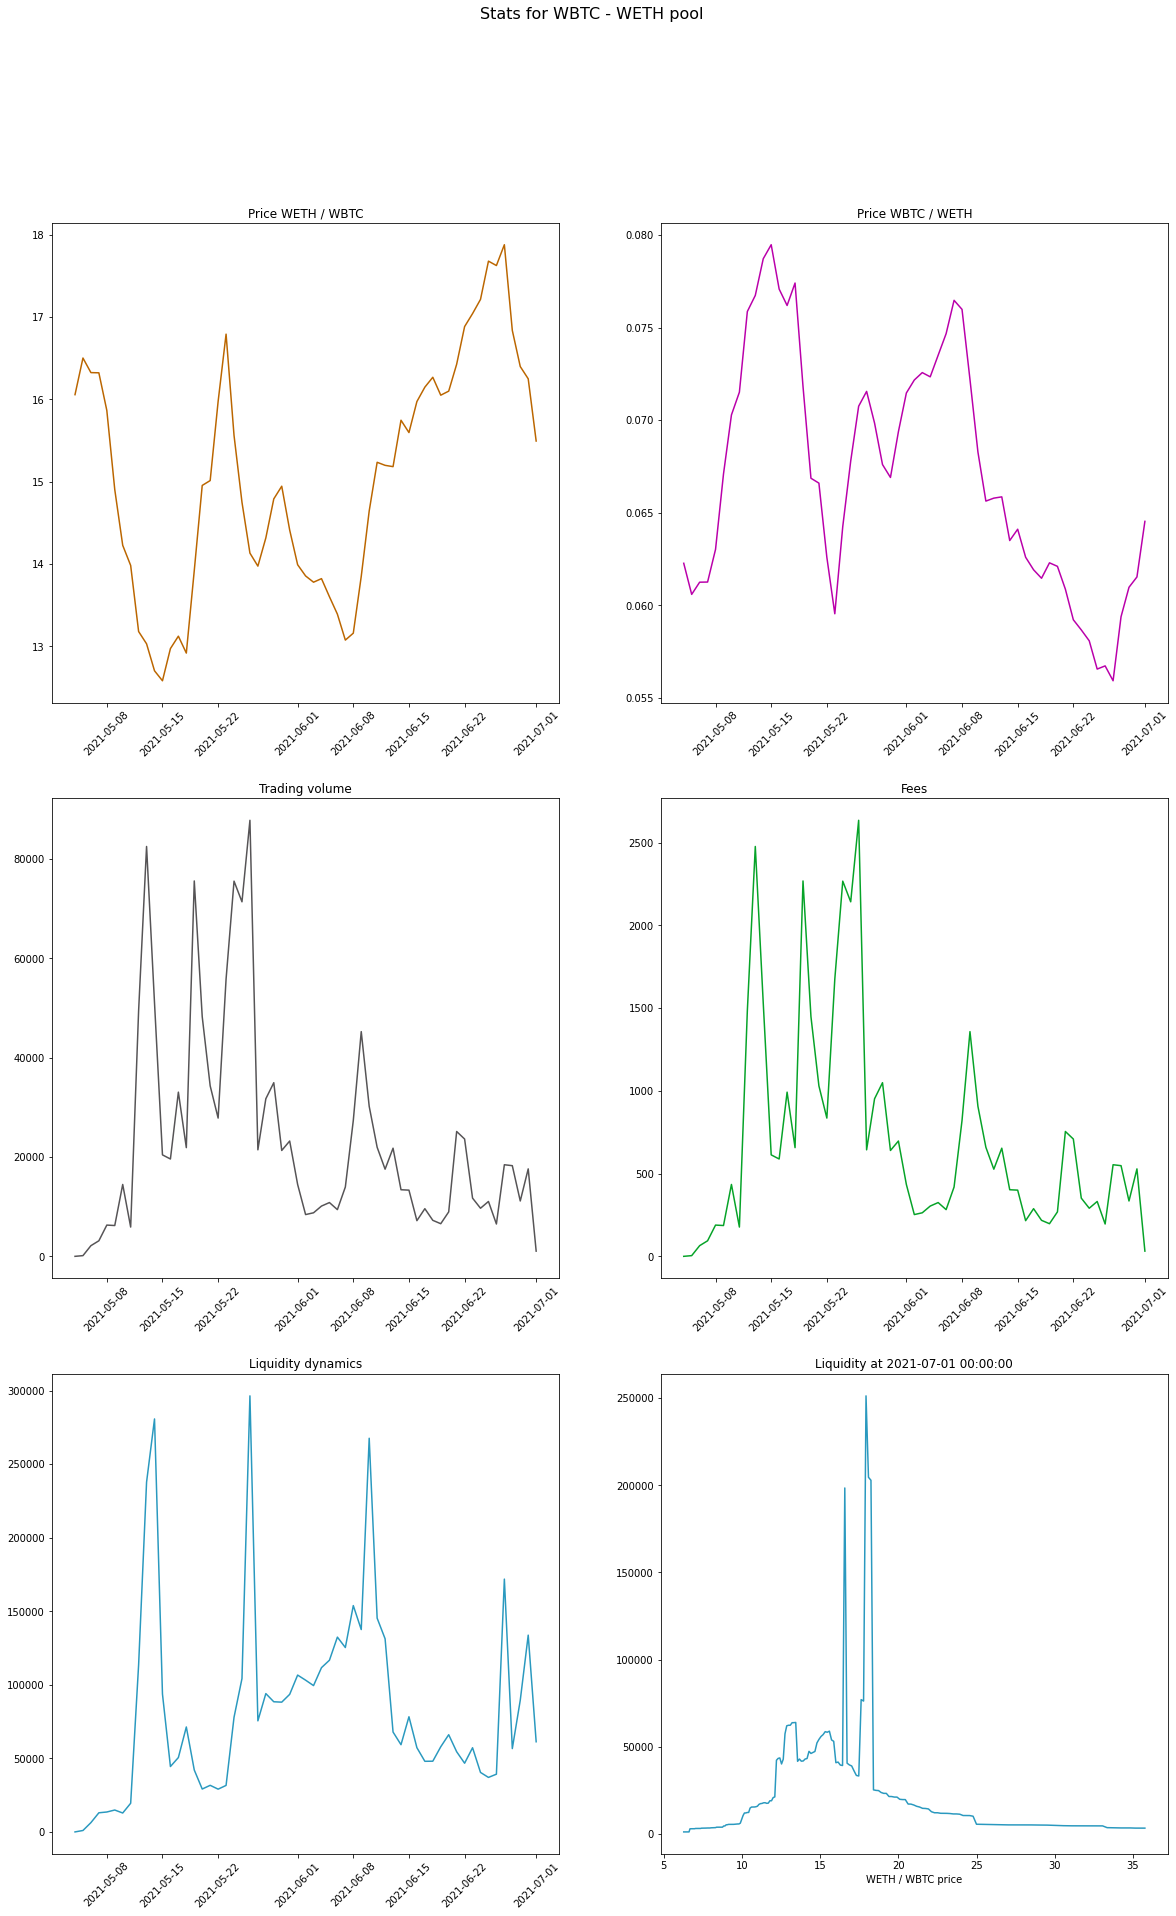

In [2]:
from strategy import PoolData, Pool, Token, Fee, Frequency
pool = Pool(Token.WBTC, Token.WETH, Fee.MIDDLE)
data = PoolData.from_pool(pool, Frequency.DAY)
data.plot()

### Define strategy

In [3]:
from strategy import Position, AbstractStrategy 
from datetime import datetime
from typing import Callable

class TickStrategy(AbstractStrategy):        
    def rebalance(
        self,
        t: datetime,
        c: float,
        vol: float,
        l: Callable[[float], float],
        pool_data: PoolData,
    ) -> bool:
        if not self.portfolio.position("main"):
            self.portfolio.add_position(Position(id="main", a = c / 1.0001 ** 60, b = c * 1.0001 ** 60))
            pos = self.portfolio.position("main")
            pos.deposit(c, 1)
        else:
            pos = self.portfolio.position("main")
            pos.set_a(c / 1.0001 ** 60, c)
            pos.set_b(c * 1.0001 ** 60, c)
            return True

        return False

### Backtest

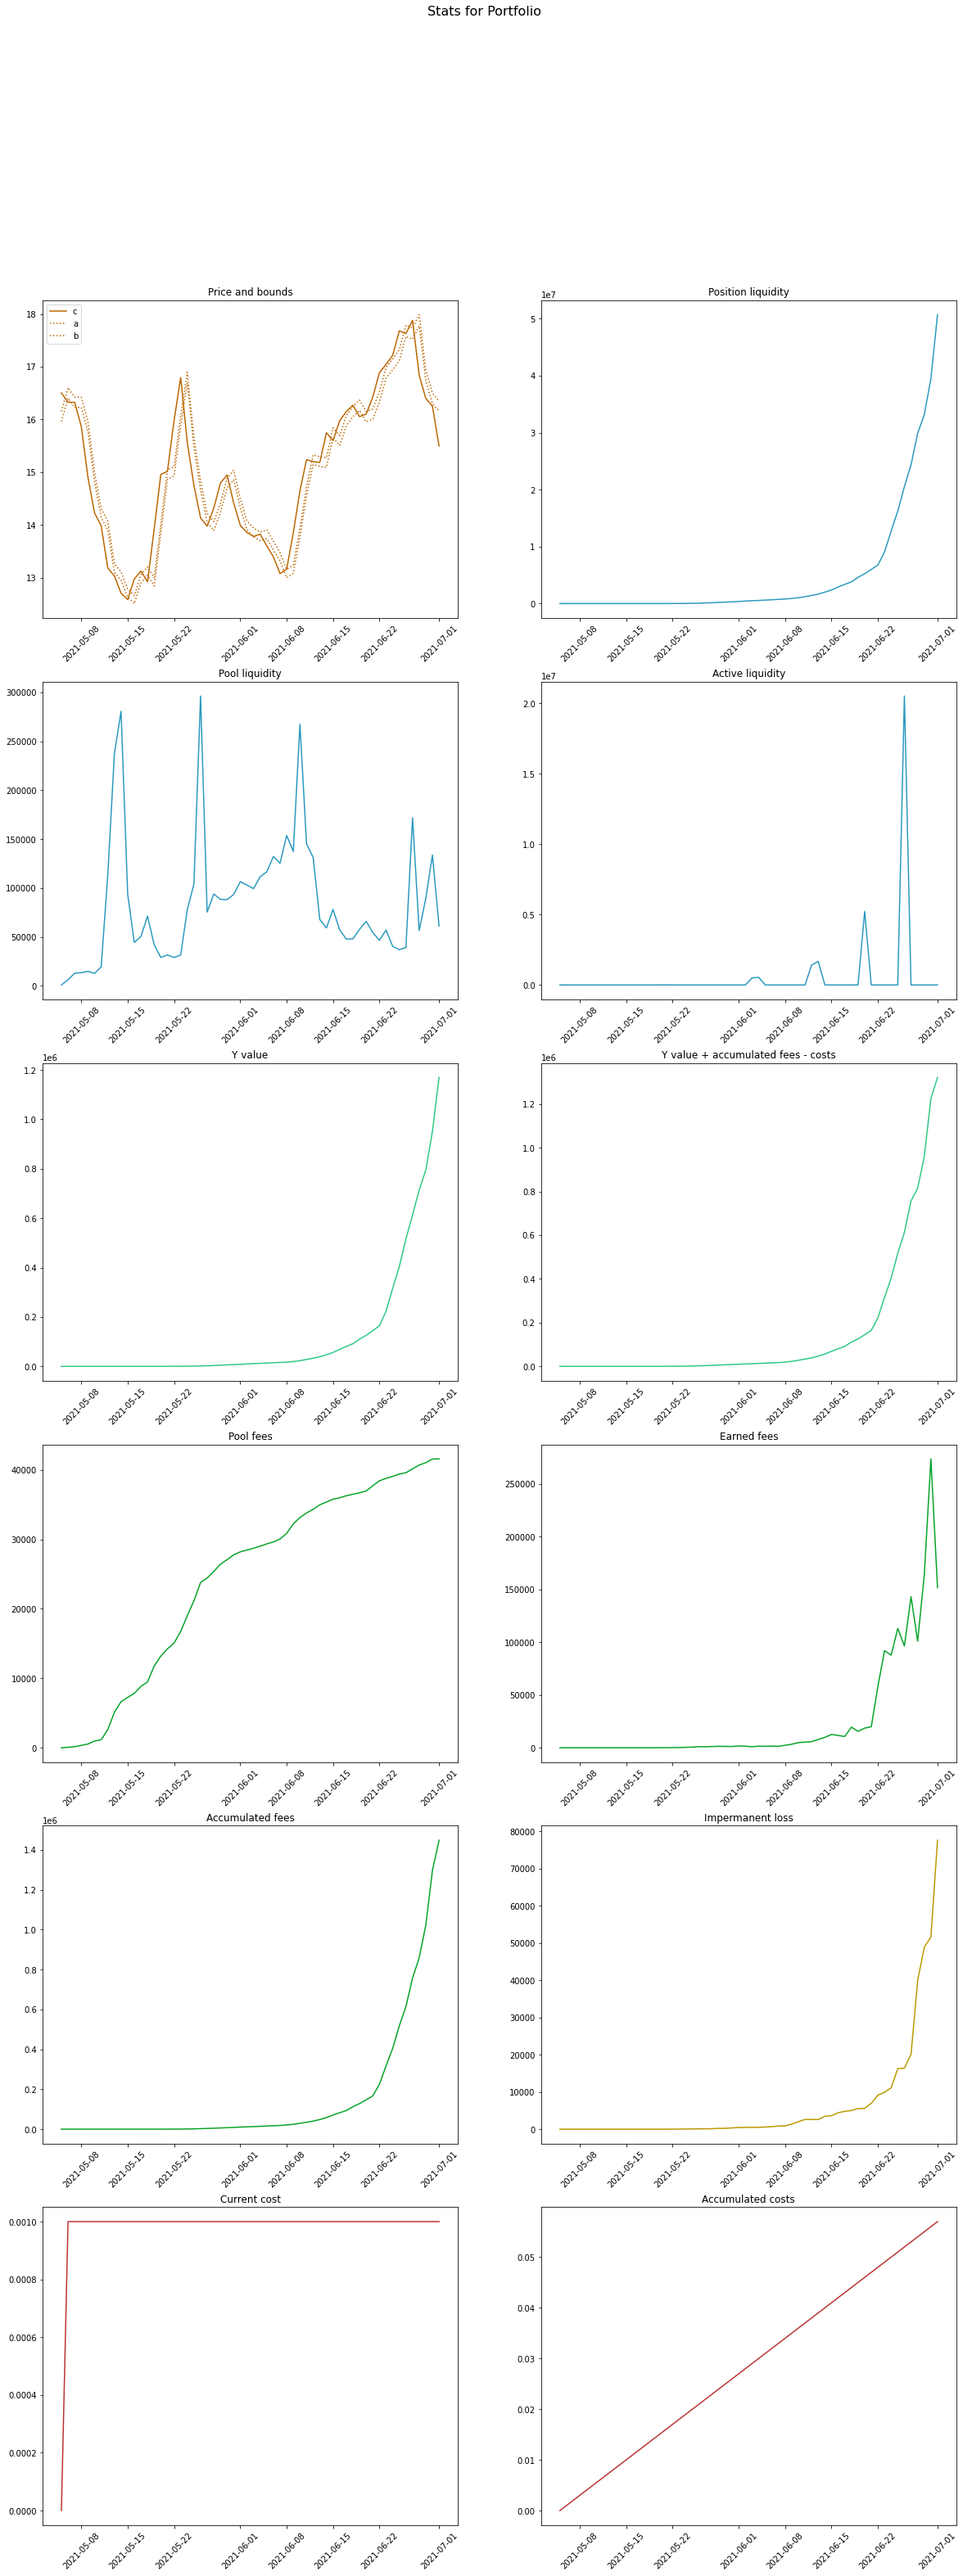

In [4]:
from strategy import Backtest

backtest = Backtest(TickStrategy)
backtest.run(data, 0.001)
backtest.plot()